<a href="https://colab.research.google.com/github/SHAIKHHUZEFA/basic-django-project/blob/master/analysis%20on%20Height_Weight%20using%20linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3## Importing Required Packages 

In [0]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
df=pd.read_csv('/gdrive/My Drive/housepricedataset.csv')

In [0]:
df=pd.read_csv("Height-Weight.csv")

In [0]:
df.head(10)

,House_Area,No_Bed,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [0]:
df.drop(labels='sex',axis=1)

,weight,height,repwt,repht
0,77,182,77.0,180.0
1,58,161,51.0,159.0
2,53,161,54.0,158.0
3,68,177,70.0,175.0
4,59,157,59.0,155.0
5,76,170,76.0,165.0
6,76,167,77.0,165.0
7,69,186,73.0,180.0
8,71,178,71.0,175.0
9,65,171,64.0,170.0


In [0]:
df1=df[['height','weight','sex']]

In [0]:
df1.head()

,height,weight,sex
0,182,77,M
1,161,58,F
2,161,53,F
3,177,68,M
4,157,59,F


In [0]:
df1.shape

(199, 3)

In [0]:
df1.size

597

In [0]:
df1.sex.dtype

dtype('O')

In [0]:
df1.height.head(5)

0    182
1    161
2    161
3    177
4    157
Name: height, dtype: int64

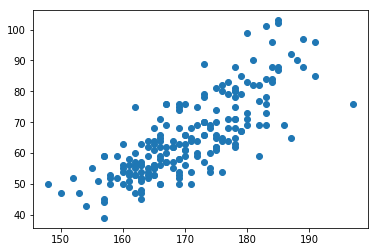

In [0]:
plt.scatter(df1.height,df1.weight)

In [0]:
df1.dtypes

height     int64
weight     int64
sex       object
dtype: object

In [0]:
df_new = df1.select_dtypes(exclude=['int64', 'float64'])
df_new1 = df1.select_dtypes(include=['int64', 'float64'])
df_encoded = df_new.apply(LabelEncoder().fit_transform)
df1 = df_new1.join(df_encoded )
df1.dtypes

height    int64
weight    int64
sex       int64
dtype: object

In [0]:
df.sex.head()

0    M
1    F
2    F
3    M
4    F
Name: sex, dtype: object

In [0]:
df1.sex.head()

0    1
1    0
2    0
3    1
4    0
Name: sex, dtype: int64

## Regression on Whole data

In [0]:
reg=LinearRegression()
reg.fit(df1[['height','sex']],df1[['weight']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
df1.drop(labels='weight',axis=1)

,height,sex
0,182,1
1,161,0
2,161,0
3,177,1
4,157,0
5,170,1
6,167,1
7,186,1
8,178,1
9,171,1


In [0]:
reg=LinearRegression()
reg.fit(df1.drop(labels='weight',axis=1),df1[['weight']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
pred=reg.predict([[40,0]])
pred

array([[-43.51483104]])

In [0]:
reg.intercept_

array([-75.72158221])

## Model Summary using Statsmodel Package

In [0]:
## Model Summary using Statsmodel Package

model1=sm.OLS(df1[['weight']],df1[['height','sex']])
result=model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6533.
Date:                Sat, 06 Apr 2019   Prob (F-statistic):          8.40e-181
Time:                        12:08:46   Log-Likelihood:                -698.69
No. Observations:                 199   AIC:                             1401.
Df Residuals:                     197   BIC:                             1408.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height         0.3465      0.005     73.933      0.000       0.337       0.356
sex           13.9873      1.204     11.618      0.000      11.613      16.362
==============================================================================
Omnibus:                       11.222   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.664
Skew:                           0.518   Prob(JB):                      0.00293
Kurtosis:                       3.578   Cond. No.                         356.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Divide the data into Training and Testing sets

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df1[['height','sex']],df1[['weight']],test_size=0.2) 

In [0]:
X_train.head()

,height,sex
71,165,0
153,163,0
186,169,0
25,169,0
8,178,1


## Train the Regression Model on Train Data

In [0]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
pred=reg.predict(X_test)
pred

array([[55.37893816],
       [84.1447272 ],
       [65.30687585],
       [73.38946137],
       [62.82489143],
       [80.83541463],
       [78.35343021],
       [57.03359444],
       [56.2062663 ],
       [67.59816438],
       [55.37893816],
       [66.77083624],
       [65.9435081 ],
       [73.38946137],
       [70.90747694],
       [57.03359444],
       [76.69877393],
       [60.34290701],
       [57.03359444],
       [77.52610207],
       [58.68825073],
       [68.42549252],
       [75.04411765],
       [80.00808649],
       [84.1447272 ],
       [54.55161002],
       [58.68825073],
       [60.34290701],
       [55.37893816],
       [67.59816438],
       [53.72428188],
       [74.21678951],
       [50.41496932],
       [78.35343021],
       [61.99756329],
       [75.87144579],
       [55.37893816],
       [57.86092259],
       [57.86092259],
       [82.49007092]])

## Predicting Results for Test set

In [0]:
reg.intercept_

array([-79.47554882])

In [0]:
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
print('Intercept: \n',reg.intercept_)

Coefficients: 
 [[0.82732814 7.25525737]]
Intercept: 
 [-79.47554882]


## Calculation of Mean Squared Error

In [0]:
mse=np.mean((y_test-pred)**2)
mse
rmse=mse**0.5
rmse

weight    9.43391
dtype: float64

In [0]:
mse

weight    88.998654
dtype: float64

In [0]:
y_test.weight[101]

47

In [0]:
pred[0]

array([55.37893816])

In [0]:
sklearn.metrics.mean_squared_error(y_test,pred)

88.99865357740286

In [0]:
reg.predict([[170,1]]) # weight value prediction for height=170  

array([[68.42549252]])

## Model Summary using Statsmodel Package

In [0]:
model1=sm.OLS(y_train,X_train)
result=model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     5657.
Date:                Sat, 06 Apr 2019   Prob (F-statistic):          5.01e-147
Time:                        12:54:11   Log-Likelihood:                -549.93
No. Observations:                 159   AIC:                             1104.
Df Residuals:                     157   BIC:                             1110.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height         0.3453      0.005     70.120      0.000       0.336       0.355
sex           13.5755      1.284     10.572      0.000      11.039      16.112
==============================================================================
Omnibus:                       14.437   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.247
Skew:                           0.610   Prob(JB):                     0.000180
Kurtosis:                       4.056   Cond. No.                         357.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""